<h1 align=center><font size=5>Data Analysis with Python</font></h1>

<h1>Data Wrangling</h1>

<h3>Welcome!</h3>

By the end of this notebook, you will have learned the basics of Data Wrangling! 

<h2>Table of content</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="#identify_missing_values">Identify missing values</a></li>
            <li><a href="#deal_missing_values">Deal with missing values</a></li>
            <li><a href="#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="#data_standardization">Data standardization</a></li>
    <li><a href="#data_normalization">Data Normalization (centering/scaling)</a></li>
    <li><a href="#binning">Binning</a></li>
    <li><a href="#indicator">Indicator variable</a></li>
</ul>
    
</div>
 
<hr>

<h2>What is the purpose of Data Wrangling?</h2>

Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.

<h3>What is the coapplicant_income for the loan data?</h3>

<h3>Import data</h3>
<p>
You can find the "Loan DataSet"  in your folder or dowload it from https://bitbucket.org/DatamastersAcademy/data-masters-academy-week-1/src/master/Lectures/3%20Pandas/Loan%20Example/</a>. 

We will be using this data set throughout this course.
</p>

<h4>Import pandas</h4> 

In [1]:
import pandas as pd
import matplotlib.pylab as plt

<h2>Reading the data set and adding the related headers.</h2>

Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set the parameter  "names" equal to the Python list "headers".

In [30]:
headers = ['LOAN', 'GENDER', 'MARRIED', 'DEPENDENTS', 'EDUCATION', 'SELF_EMPLOYED', 'APPLICANT_INCOME', 'COAPPLICANT_INCOME',
'LOAN_AMOUNT', 'LOAN_AMOUNT_TERM', 'CREDIT_HISTORY', 'PROPERTY_AREA', 'LOAN_STATUS']

df = pd.read_csv('dataset.csv', names=headers, header=None, skiprows=1) # use a predefined list of columns

 Use the method <b>head()</b> to display the first five rows of the dataframe. 

In [31]:
df.head()

LOAN GENDER MARRIED DEPENDENTS     EDUCATION SELF_EMPLOYED  \
0  LP001002   Male      No          0             ?            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   APPLICANT_INCOME  COAPPLICANT_INCOME LOAN_AMOUNT LOAN_AMOUNT_TERM  \
0              5849                 0.0         NaN              360   
1              4583              1508.0         128              360   
2              3000                 0.0          66              360   
3              2583              2358.0         120              360   
4              6000                 0.0         141              360   

   CREDIT_HISTORY PROPERTY_AREA LOAN_STATUS  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis. 
<div>So, how do we identify all those missing values and deal with them?</div> 


<b>How to work with missing data?</b>

Steps for working with missing data:
<ol>
    <li>dentify missing data</li>
    <li>deal with missing data</li>
    <li>correct data format</li>
</ol>

<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>


<h3 id="identify_missing_values">Identify missing values</h3>
<h4>Convert "?" to NaN</h4>
In the car dataset, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience. Here we use the function: 
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B

In [32]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

LOAN GENDER MARRIED DEPENDENTS     EDUCATION SELF_EMPLOYED  \
0  LP001002   Male      No          0           NaN            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   APPLICANT_INCOME  COAPPLICANT_INCOME LOAN_AMOUNT LOAN_AMOUNT_TERM  \
0              5849                 0.0         NaN              360   
1              4583              1508.0         128              360   
2              3000                 0.0          66              360   
3              2583              2358.0         120              360   
4              6000                 0.0         141              360   

   CREDIT_HISTORY PROPERTY_AREA LOAN_STATUS  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

dentify_missing_values

<h4>Evaluating for Missing Data</h4>

The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [33]:
missing_data = df.isnull()
missing_data.head(5)

LOAN  GENDER  MARRIED  DEPENDENTS  EDUCATION  SELF_EMPLOYED  \
0  False   False    False       False       True          False   
1  False   False    False       False      False          False   
2  False   False    False       False      False          False   
3  False   False    False       False      False          False   
4  False   False    False       False      False          False   

   APPLICANT_INCOME  COAPPLICANT_INCOME  LOAN_AMOUNT  LOAN_AMOUNT_TERM  \
0             False               False         True             False   
1             False               False        False             False   
2             False               False        False             False   
3             False               False        False             False   
4             False               False        False             False   

   CREDIT_HISTORY  PROPERTY_AREA  LOAN_STATUS  
0           False          False        False  
1           False          False        False  
2           False          False        False  
3           False          False        False  
4           False          False        False

"True" stands for missing value, while "False" stands for not missing value.

<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  In the body of the for loop the method  ".value_counts()"  counts the number of "True" values. 
</p>

In [34]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

LOAN
False    614
Name: LOAN, dtype: int64

GENDER
False    601
True      13
Name: GENDER, dtype: int64

MARRIED
False    611
True       3
Name: MARRIED, dtype: int64

DEPENDENTS
False    599
True      15
Name: DEPENDENTS, dtype: int64

EDUCATION
False    613
True       1
Name: EDUCATION, dtype: int64

SELF_EMPLOYED
False    582
True      32
Name: SELF_EMPLOYED, dtype: int64

APPLICANT_INCOME
False    614
Name: APPLICANT_INCOME, dtype: int64

COAPPLICANT_INCOME
False    614
Name: COAPPLICANT_INCOME, dtype: int64

LOAN_AMOUNT
False    591
True      23
Name: LOAN_AMOUNT, dtype: int64

LOAN_AMOUNT_TERM
False    599
True      15
Name: LOAN_AMOUNT_TERM, dtype: int64

CREDIT_HISTORY
False    564
True      50
Name: CREDIT_HISTORY, dtype: int64

PROPERTY_AREA
False    614
Name: PROPERTY_AREA, dtype: int64

LOAN_STATUS
False    613
True       1
Name: LOAN_STATUS, dtype: int64



Based on the summary above, each column has 205 rows of data, seven columns containing missing data:
<ol>
    <li>"GENDER": 13 missing data</li>
    <li>"MARRIED": 3 missing data</li>
    <li>"DEPENDENTS": 15 missing data</li>
    ....
</ol>







<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>
<ul>
    <li>"LOAN_AMOUNT_TERM": 15 missing data, replace them with mean</li>
    <li>"LOAN_AMOUNT": 23 missing data, replace them with mean</li>
 
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"GENDER": 13 missing data, replace them with "male". 
        <ul>
            <li>Reason: 81% of gender is male. Since male is most frequent, it is most likely to occur</li>
        </ul>
    </li>
    <li>"CREDIT_HISTORY" : 50 missing data,replace with "1"
    </li>
    <li>"SELF_EMPLOYED": 32 missing data,replace with No</li>
    <li>"EDUCATION": 1 missing data,replace with Graduate </li>
    <li>"MARRIED": 3 missing data, replacing it with "Yes"</li>
    <li>"DEPENDENTS" 15 missing data, replacing it with 0</li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"LOAN_STATUS": 1 missing data, simply delete the whole row
        <ul>
            <li>Reason: loan status is what we want to predict. Any data entry without loan status data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

<h4>Calculate the average of the column </h4>

In [36]:
avg_norm_loss = df["LOAN_AMOUNT_TERM"].astype("float").mean(axis=0)
print("Average of loan_amount_term:", avg_norm_loss)

Average of loan_amount_term: 341.9699499165275


<h4>Replace "NaN" by mean value in "loan amount term" column</h4>

In [37]:
df["LOAN_AMOUNT_TERM"].replace(np.nan, avg_norm_loss, inplace=True)

<h4>Calculate the mean value for 'LOAN_AMOUNT' column</h4>

In [39]:
avg_loan_amount=df['LOAN_AMOUNT'].astype('float').mean(axis=0)
print("Average of loan amount:", avg_loan_amount)

Average of loan amount: 146.49915397631133


<h4>Replace NaN by mean value</h4>

In [40]:
df['LOAN_AMOUNT'].replace(np.nan, avg_bore, inplace=True)

<h4>See the distribution of the column MARRIED</h4>

In [29]:
df.MARRIED.value_counts()

Yes    398
No     213
Name: MARRIED, dtype: int64

<h4>Change the missing values of MARRIED with "Yes"</h4>

In [41]:
df["MARRIED"].replace(np.nan, "Yes", inplace=True)

<h4>See the distribution of the rest of the categorical variables</h4>

In [46]:
df.CREDIT_HISTORY.value_counts()

1.0    475
0.0     89
Name: CREDIT_HISTORY, dtype: int64

In [45]:
df.GENDER.value_counts()

Male      489
Female    112
Name: GENDER, dtype: int64

In [47]:
df.DEPENDENTS.value_counts()


0     345
1     102
2     101
3+     51
Name: DEPENDENTS, dtype: int64

In [48]:
df.EDUCATION.value_counts()


Graduate        479
Not Graduate    134
Name: EDUCATION, dtype: int64

In [49]:
df.SELF_EMPLOYED.value_counts()


No     500
Yes     82
Name: SELF_EMPLOYED, dtype: int64

<h4> Fill the NaN with the most frequent column from all of the variables

In [51]:
df["CREDIT_HISTORY"].replace(np.nan, "1.0", inplace=True)
df["GENDER"].replace(np.nan, "Male", inplace=True)
df["DEPENDENTS"].replace(np.nan, "0", inplace=True)
df["EDUCATION"].replace(np.nan, "Graduate", inplace=True)
df["SELF_EMPLOYED"].replace(np.nan, "No", inplace=True)


Finally, let's drop all rows that do not have Loan Status:

In [52]:
df.dropna(subset=["LOAN_STATUS"], axis=0, inplace=True)

<h4> Let's check now 

In [54]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

LOAN
False    613
Name: LOAN, dtype: int64

GENDER
False    613
Name: GENDER, dtype: int64

MARRIED
False    613
Name: MARRIED, dtype: int64

DEPENDENTS
False    613
Name: DEPENDENTS, dtype: int64

EDUCATION
False    613
Name: EDUCATION, dtype: int64

SELF_EMPLOYED
False    613
Name: SELF_EMPLOYED, dtype: int64

APPLICANT_INCOME
False    613
Name: APPLICANT_INCOME, dtype: int64

COAPPLICANT_INCOME
False    613
Name: COAPPLICANT_INCOME, dtype: int64

LOAN_AMOUNT
False    613
Name: LOAN_AMOUNT, dtype: int64

LOAN_AMOUNT_TERM
False    613
Name: LOAN_AMOUNT_TERM, dtype: int64

CREDIT_HISTORY
False    613
Name: CREDIT_HISTORY, dtype: int64

PROPERTY_AREA
False    613
Name: PROPERTY_AREA, dtype: int64

LOAN_STATUS
False    613
Name: LOAN_STATUS, dtype: int64



<h3> YEYY!!!!! NO MISSING VALUES ANY MORE

<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use 
<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>

<h4>Lets list the data types for each column</h4>

In [55]:
df.dtypes

LOAN                   object
GENDER                 object
MARRIED                object
DEPENDENTS             object
EDUCATION              object
SELF_EMPLOYED          object
APPLICANT_INCOME        int64
COAPPLICANT_INCOME    float64
LOAN_AMOUNT            object
LOAN_AMOUNT_TERM       object
CREDIT_HISTORY         object
PROPERTY_AREA          object
LOAN_STATUS            object
dtype: object

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'LOAN_AMOUNT' and 'LOAN_AMOUNT_TERM' variables are numerical values that describe the loans, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.</p> 

<h4>Convert data types to proper format</h4>

In [56]:
df[["LOAN_AMOUNT", "LOAN_AMOUNT_TERM"]] = df[["LOAN_AMOUNT", "LOAN_AMOUNT_TERM"]].astype("float")


<h4>Let us list the columns after the conversion</h4>

In [57]:
df.dtypes

LOAN                   object
GENDER                 object
MARRIED                object
DEPENDENTS             object
EDUCATION              object
SELF_EMPLOYED          object
APPLICANT_INCOME        int64
COAPPLICANT_INCOME    float64
LOAN_AMOUNT           float64
LOAN_AMOUNT_TERM      float64
CREDIT_HISTORY         object
PROPERTY_AREA          object
LOAN_STATUS            object
dtype: object

<b>Wonderful!</b>

Now, we finally obtain the cleaned dataset with no missing values and all data in its proper format.

In [59]:
df.LOAN_AMOUNT_TERM.value_counts()

360.00000    510
180.00000     44
341.96995     15
480.00000     15
300.00000     13
84.00000       4
240.00000      4
120.00000      3
36.00000       2
60.00000       2
12.00000       1
Name: LOAN_AMOUNT_TERM, dtype: int64

<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation)
</p>
    
<b>What is Standardization?</b>
<p>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</p>

<b>Example</b>
<p>Transform LOAN_AMOUNT_TERM to YEARS:</p>
<p>In our dataset, the loan amount term column is represented in laon amount term in months. Assume we are developing an application where we want to use the loan amount term for a year.</p>
<p>We will need to apply <b>data transformation</b> to transform month into years?</p>


In [60]:
df.head()

LOAN GENDER MARRIED DEPENDENTS     EDUCATION SELF_EMPLOYED  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   APPLICANT_INCOME  COAPPLICANT_INCOME  LOAN_AMOUNT  LOAN_AMOUNT_TERM  \
0              5849                 0.0   146.499154             360.0   
1              4583              1508.0   128.000000             360.0   
2              3000                 0.0    66.000000             360.0   
3              2583              2358.0   120.000000             360.0   
4              6000                 0.0   141.000000             360.0   

  CREDIT_HISTORY PROPERTY_AREA LOAN_STATUS  
0              1         Urban           Y  
1              1         Rural           N  
2              1         Urban           Y  
3              1         Urban           Y  
4              1         Urban           Y

In [61]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['LOAN_AMOUNT_TERM'] = df["LOAN_AMOUNT_TERM"]/12

# check your transformed data 
df.head()

LOAN GENDER MARRIED DEPENDENTS     EDUCATION SELF_EMPLOYED  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   APPLICANT_INCOME  COAPPLICANT_INCOME  LOAN_AMOUNT  LOAN_AMOUNT_TERM  \
0              5849                 0.0   146.499154              30.0   
1              4583              1508.0   128.000000              30.0   
2              3000                 0.0    66.000000              30.0   
3              2583              2358.0   120.000000              30.0   
4              6000                 0.0   141.000000              30.0   

  CREDIT_HISTORY PROPERTY_AREA LOAN_STATUS  
0              1         Urban           Y  
1              1         Rural           N  
2              1         Urban           Y  
3              1         Urban           Y  
4              1         Urban           Y

<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1
</p>

<b>Example</b>
<p>To demonstrate normalization, let's say we want to scale the columns "COAPPLICANT_INCOME", "APPLICANT_INCOME" </p>
<p><b>Target:</b>would like to Normalize those variables so their value ranges from 0 to 1.</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>

In [64]:
# replace (original value) by (original value)/(maximum value)
df['APPLICANT_INCOME'] = df['APPLICANT_INCOME']/df['APPLICANT_INCOME'].max()
df['COAPPLICANT_INCOME'] = df['COAPPLICANT_INCOME']/df['COAPPLICANT_INCOME'].max()

<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
</p>

<b>Example: </b>
<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins </p>



In [66]:
df["LOAN_AMOUNT_TERM"]=df["LOAN_AMOUNT_TERM"].astype(int, copy=True)

Lets plot the histogram of LOAN_AMOUNT_TERM, to see what the distribution of loan amount term looks like.

Text(0.5,1,'LOAN_AMOUNT_TERM bins')

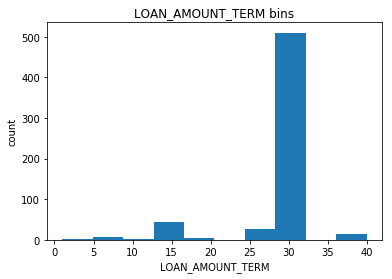

In [67]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["LOAN_AMOUNT_TERM"])

# set x/y labels and plot title
plt.pyplot.xlabel("LOAN_AMOUNT_TERM")
plt.pyplot.ylabel("count")
plt.pyplot.title("LOAN_AMOUNT_TERM bins")

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of loan amount term we want to set start_value=min(df["LOAN_AMOUNT_TERM"]).</p>
<p>Since we want to include the maximum value of LOAN_AMOUNT_TERM we want to set end_value=max(df["LOAN_AMOUNT_TERM"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.</p>

We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins.

In [68]:
bins = np.linspace(min(df["LOAN_AMOUNT_TERM"]), max(df["LOAN_AMOUNT_TERM"]), 4)
bins

array([ 1., 14., 27., 40.])

In [70]:
group_names = ['Low', 'Medium', 'High']

 We apply the function "cut" the determine what each value of "df['LOAN_AMOUNT_TERM']" belongs to. 

In [72]:
df['LOAN_AMOUNT_TERM-binned'] = pd.cut(df['LOAN_AMOUNT_TERM'], bins, labels=group_names, include_lowest=True )
df[['LOAN_AMOUNT_TERM','LOAN_AMOUNT_TERM-binned']].head(20)

LOAN_AMOUNT_TERM LOAN_AMOUNT_TERM-binned
0                 30                    High
1                 30                    High
2                 30                    High
3                 30                    High
4                 30                    High
5                 30                    High
6                 30                    High
8                 30                    High
9                 28                    High
10                30                    High
11                30                    High
12                30                    High
13                30                    High
14                10                     Low
15                30                    High
16                20                  Medium
17                30                    High
18                30                    High
19                28                    High
20                30                    High

In [73]:
df["LOAN_AMOUNT_TERM-binned"].value_counts()

High      540
Medium     61
Low        12
Name: LOAN_AMOUNT_TERM-binned, dtype: int64

Text(0.5,1,'loan amoutnt bins')

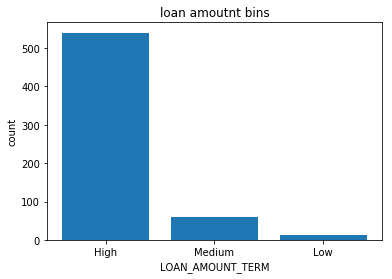

In [75]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(['High','Medium','Low'], df["LOAN_AMOUNT_TERM-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("LOAN_AMOUNT_TERM")
plt.pyplot.ylabel("count")
plt.pyplot.title("loan amoutnt bins")

<p>
    Check the dataframe above carefully, you will find the last column provides the bins for "loan amount term" with 3 categories ("Low","Medium" and "High"). 
</p>
<p>
    We successfully narrow the intervals from 57 to 3!
</p>

<h3>Bins visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 

In [77]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["LOAN_AMOUNT_TERM"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("loan amount term")
plt.pyplot.ylabel("count")
plt.pyplot.title("loan amount term bins")

Text(0.5,1,'loan amount term bins')

<h2 id="indicator">Indicator variable (or dummy variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>
<p>
    So we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "GENDER" has two unique values, "Male" or "Female". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "GENDER" into indicator variables.
</p>

<p>
    We will use the panda's method 'get_dummies' to assign numerical values to different categories of gender type. 
</p>

In [78]:
df.columns

Index(['LOAN', 'GENDER', 'MARRIED', 'DEPENDENTS', 'EDUCATION', 'SELF_EMPLOYED',
       'APPLICANT_INCOME', 'COAPPLICANT_INCOME', 'LOAN_AMOUNT',
       'LOAN_AMOUNT_TERM', 'CREDIT_HISTORY', 'PROPERTY_AREA', 'LOAN_STATUS',
       'horsepower-binned', 'LOAN_AMOUNT_TERM-binned'],
      dtype='object')

In [82]:
dummy_variable_1 = pd.get_dummies(df["GENDER"])
dummy_variable_1.rename(columns={'Female':'gender_female', 'Male':'gender_male'}, inplace=True)
dummy_variable_1.head()

gender_female  gender_male
0              0            1
1              0            1
2              0            1
3              0            1
4              0            1

In the row where we had the "GERNDER" column with Female , we will have 1 in the column gender_female and 0 in the column gender_male. 

In [85]:
df[['GENDER_FEMALE','GENDER_MALE']] = dummy_variable_1

In [86]:
df.head()

LOAN GENDER MARRIED DEPENDENTS     EDUCATION SELF_EMPLOYED  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   APPLICANT_INCOME  COAPPLICANT_INCOME  LOAN_AMOUNT  LOAN_AMOUNT_TERM  \
0          0.072210            0.000000   146.499154                30   
1          0.056580            0.036192   128.000000                30   
2          0.037037            0.000000    66.000000                30   
3          0.031889            0.056592   120.000000                30   
4          0.074074            0.000000   141.000000                30   

  CREDIT_HISTORY PROPERTY_AREA LOAN_STATUS horsepower-binned  \
0              1         Urban           Y              High   
1              1         Rural           N              High   
2              1         Urban           Y              High   
3              1         Urban           Y              High   
4              1         Urban           Y              High   

  LOAN_AMOUNT_TERM-binned  gender_female  gender_male  GENDER_FEMALE  \
0                    High              0            1              0   
1                    High              0            1              0   
2                    High              0            1              0   
3                    High              0            1              0   
4                    High              0            1              0   

   GENDER_MALE  
0            1  
1            1  
2            1  
3            1  
4            1

<h3>LabelEncoder

Label Encoding is another strategy of dealing with categorical features. Encode labels with value between 0 and n_classes-1.

For us to be able to use Label Encoder we need to install the library sklearn . 

In [87]:
from sklearn.preprocessing import LabelEncoder


Make an instance of the class LabelEncoder

In [94]:
lb_make = LabelEncoder()


Encode the variable that you want using Label Encoder . Lets take the variable DEPENDENTS.

In [90]:
df.DEPENDENTS.value_counts()


0     360
1     102
2     101
3+     50
Name: DEPENDENTS, dtype: int64

In [95]:
df['DEPENDENTS_CODE'] = lb_make.fit_transform(df['DEPENDENTS'])

In [98]:
df['DEPENDENTS_CODE'].value_counts()

0    360
1    102
2    101
3     50
Name: DEPENDENTS_CODE, dtype: int64

In [99]:
df.head()

LOAN GENDER MARRIED DEPENDENTS     EDUCATION SELF_EMPLOYED  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   APPLICANT_INCOME  COAPPLICANT_INCOME  LOAN_AMOUNT  LOAN_AMOUNT_TERM  \
0          0.072210            0.000000   146.499154                30   
1          0.056580            0.036192   128.000000                30   
2          0.037037            0.000000    66.000000                30   
3          0.031889            0.056592   120.000000                30   
4          0.074074            0.000000   141.000000                30   

  CREDIT_HISTORY PROPERTY_AREA LOAN_STATUS horsepower-binned  \
0              1         Urban           Y              High   
1              1         Rural           N              High   
2              1         Urban           Y              High   
3              1         Urban           Y              High   
4              1         Urban           Y              High   

  LOAN_AMOUNT_TERM-binned  gender_female  gender_male  GENDER_FEMALE  \
0                    High              0            1              0   
1                    High              0            1              0   
2                    High              0            1              0   
3                    High              0            1              0   
4                    High              0            1              0   

   GENDER_MALE  DEPENDENTS_CODE  
0            1                0  
1            1                1  
2            1                0  
3            1                0  
4            1                0

<h2> EXCERSISE: 

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>As above, make a dummy variables for columns:
    <li>GENDER</li>
    <li>MARRIED</li>
    <li>EDUCATION</li>
    <li>PROPERTY_AREA</li>
</b>
</div>